# Customer Segmentation Classification

## _Context (Use Case)_
An *automobile company* has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

In [124]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Test & Train datasets

In [125]:
train_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Train.csv")

In [126]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [127]:
train_df.shape

(8068, 11)

In [128]:
# test_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Test.csv")
# test_df.head()

In [129]:
# test_df.shape

In [130]:
df = train_df.copy()

In [131]:
df1 = df.copy()

# ------------------------------------------------------------------------

In [132]:
df2 = df1.copy()

In [133]:
# item_dict = dict(df2.isna().sum())
# item_dict

In [134]:
# new_dict = {k: v for k, v in sorted(item_dict.items(), key=lambda item: item[1])}

In [135]:
# new_dict

In [136]:
# lst = []
# for i in new_dict:
#     if new_dict[i]!=0:
#         print(i)
#         lst.append(i)
#         print(lst)
# print("final list",lst)

In [137]:
# lst = []
# data_loss = []
# for i in new_dict:
#     if new_dict[i]!=0:
# #         print(i)
#         lst.append(i)
#         print("Choosen Feature: ", lst)
#         df2.dropna(subset=lst, inplace=True)
#         loss = (train_df.shape[0] - df2.shape[0] )*100/train_df.shape[0]
#         data_loss.append(loss)
#         print("Data Loss after dropping NAN of choosen Feature : ", round(data_loss[-1],2), "%")
# # print("Final list",lst)
# # print("final data loss list",data_loss)

In [138]:
# df2.shape

In [139]:
df.shape

(8068, 11)

In [140]:
col_lst = ['Var_1', 'Graduated', 'Profession', 'Ever_Married', 'Family_Size']

In [141]:
df.dropna(axis =0, subset=col_lst, how='any', inplace=True)

In [142]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    711
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64

In [143]:
df.shape

(7376, 11)

In [144]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [145]:
df['Work_Experience'].value_counts()

1.0     2187
0.0     2133
9.0      443
8.0      397
2.0      259
3.0      235
4.0      233
6.0      187
7.0      185
5.0      179
10.0      51
12.0      45
11.0      45
13.0      43
14.0      43
Name: Work_Experience, dtype: int64

In [146]:
# replace Nan of Work_exp with 0, if 'not Graduated'
def check_exp(col):
    Work_Experience = col[0]
    Graduated = col[1]
    
    if pd.isnull(Work_Experience):
        if Graduated == 'No':
            return 0
    else:
        return col[0]

In [147]:
df['Work_Experience'] = df[['Work_Experience', 'Graduated']].apply(check_exp, axis=1)

In [148]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    399
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64

In [149]:
df['Work_Experience'].value_counts()

0.0     2445
1.0     2187
9.0      443
8.0      397
2.0      259
3.0      235
4.0      233
6.0      187
7.0      185
5.0      179
10.0      51
12.0      45
11.0      45
13.0      43
14.0      43
Name: Work_Experience, dtype: int64

In [150]:
print (df.describe())

                  ID          Age  Work_Experience  Family_Size
count    7376.000000  7376.000000      6977.000000  7376.000000
mean   463474.733595    43.531996         2.511538     2.847343
std      2583.274059    16.618211         3.372415     1.528048
min    458982.000000    18.000000         0.000000     1.000000
25%    461292.750000    31.000000         0.000000     2.000000
50%    463459.500000    41.000000         1.000000     3.000000
75%    465698.250000    53.000000         4.000000     4.000000
max    467974.000000    89.000000        14.000000     9.000000


In [151]:
df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace = True)

In [152]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [153]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.511538,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.511538,High,6.0,Cat_6,A


## 2. Handling Categorical Column

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7376 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7376 non-null   int64  
 1   Gender           7376 non-null   object 
 2   Ever_Married     7376 non-null   object 
 3   Age              7376 non-null   int64  
 4   Graduated        7376 non-null   object 
 5   Profession       7376 non-null   object 
 6   Work_Experience  7376 non-null   float64
 7   Spending_Score   7376 non-null   object 
 8   Family_Size      7376 non-null   float64
 9   Var_1            7376 non-null   object 
 10  Segmentation     7376 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 691.5+ KB


In [155]:
df.Spending_Score.value_counts()

Low        4401
Average    1844
High       1131
Name: Spending_Score, dtype: int64

- Applying Label encoding on Spending score

In [156]:
change_var = {"Spending_Score":     {"Low": 1, "Average": 2, "High": 3}}

In [157]:
df = df.replace(change_var)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,1,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.511538,2,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,1,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,3,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.511538,3,6.0,Cat_6,A


- Applying One-hot-encoding to rest of the Categorical column

In [158]:
# Gender = pd.get_dummies(df['Gender'], drop_first=True)
# Ever_Married = pd.get_dummies(df['Ever_Married'], drop_first=True)
# Graduated = pd.get_dummies(df['Graduated'], drop_first=True)
# Profession = pd.get_dummies(df['Profession'], drop_first=True)
# Var_1 = pd.get_dummies(df['Var_1'], drop_first=True)

In [159]:
# df.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1'], axis=1, inplace=True)

In [160]:
# df.head()

In [161]:
# df = pd.concat([df, Gender, Ever_Married, Graduated, Profession, Var_1 ], axis =1)
# df.shape

In [37]:
# pd.set_option('display.max_columns', None)

In [38]:
# df.head()

In [162]:
df.drop(['ID', 'Profession','Var_1' ], axis=1, inplace=True)

### Converting 'float' values into 'int'

In [163]:
# df = df.astype(int)

In [164]:
df.shape

(7376, 8)

In [165]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,1.000000,1,4.0,D
1,Female,Yes,38,Yes,2.511538,2,3.0,A
2,Female,Yes,67,Yes,1.000000,1,1.0,B
3,Male,Yes,67,Yes,0.000000,3,2.0,B
4,Female,Yes,40,Yes,2.511538,3,6.0,A


In [166]:
df['Work_Experience'] = df['Work_Experience'].astype(int)

In [167]:
df['Family_Size'] = df['Family_Size'].astype(int)

In [168]:
# df.head()

In [169]:
# change_var = {"Segmentation":     {"A": 1, "B": 2, "C": 3, "D":4}}

In [170]:
# df = df.replace(change_var)
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,1,1,4,D
1,Female,Yes,38,Yes,2,2,3,A
2,Female,Yes,67,Yes,1,1,1,B
3,Male,Yes,67,Yes,0,3,2,B
4,Female,Yes,40,Yes,2,3,6,A


In [171]:
df.shape

(7376, 8)

In [172]:
# df['Age_Bins'] = pd.qcut(df['Age'], 5, labels=['Age_lt_31', 'Age_31_to_35', 'Age_35_to_40', 'Age_40_to_46', 'Age_gt_46'])

In [173]:
df3 = df.copy()

In [174]:
# def fill_workexp(col):
#     Work_Experience = col[0]
    
#     if pd.notnull(Work_Experience):
#         if Work_Experience <= 1:
#             return 'Exp_lt_equal_1'
#         if ((Work_Experience>= 2) and (Work_Experience<= 7)):
#             return 'Exp_2_to_7'
#         if ((Work_Experience>= 8) and (Work_Experience<= 9)):
#             return 'Exp_8_to_9'
#         else:
#             return 'Exp_gt_9'
#     else:
#         return col[0]

In [175]:
# df3['Work_Experience'] = df3[['Work_Experience']].apply(fill_workexp, axis=1)

In [176]:
# df['Work_Experience'] = pd.qcut(df['Work_Experience'], 5, labels=['Exp_lt_1','Exp_1_to_2' 'Exp_2_to_7', 'Exp_7_to_9', 'Exp_gt_9'],
#                                duplicates='drop')
# # df['Family_Size'] = pd.qcut(df['Family_Size'], 5, labels=['Size_lt_1', 'Size_1_to_2', 'Size_2_to_5', 'Size_gt_9'],duplicates='drop')

In [177]:
# def fill_workexp(col):
#     Family_Size = col[0]
    
#     if pd.notnull(Family_Size):
#         if Family_Size <= 1:
#             return 'FamSize_1'
#         if Family_Size == 2:
#             return 'FamSize_2'
#         if ((Family_Size>= 3) and (Family_Size<= 5)):
#             return 'FamSize_3_to_5'
#         else:
#             return 'FamSize_gt_6'
#     else:
#         return col[0]

In [178]:
# df3['Family_Size'] = df3[['Family_Size']].apply(fill_workexp, axis=1)

In [179]:
# df3.head()

In [180]:
# df3.drop(['Age'], axis=1, inplace=True)

In [181]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,1,1,4,D
1,Female,Yes,38,Yes,2,2,3,A
2,Female,Yes,67,Yes,1,1,1,B
3,Male,Yes,67,Yes,0,3,2,B
4,Female,Yes,40,Yes,2,3,6,A


In [182]:
df.shape

(7376, 8)

In [183]:
Gender = pd.get_dummies(df['Gender'], drop_first=True)
Ever_Married = pd.get_dummies(df['Ever_Married'], drop_first=True)
Graduated = pd.get_dummies(df['Graduated'], drop_first=True)
# Profession = pd.get_dummies(df['Profession'], drop_first=True)
# Work_Experience = pd.get_dummies(df3['Work_Experience'], drop_first=True)
# Family_Size = pd.get_dummies(df3['Family_Size'], drop_first=True)
# Var_1 = pd.get_dummies(df['Var_1'], drop_first=True)
# Age_Bins = pd.get_dummies(df3['Age_Bins'], drop_first=True)

In [184]:
df.drop(['Gender', 'Ever_Married', 'Graduated'], axis=1, inplace=True)
df.head()

,Age,Work_Experience,Spending_Score,Family_Size,Segmentation
0,22,1,1,4,D
1,38,2,2,3,A
2,67,1,1,1,B
3,67,0,3,2,B
4,40,2,3,6,A


In [185]:
df4 = pd.concat([df, Gender, Ever_Married, Graduated], axis =1)

In [186]:
df4.head()

,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Male,Yes,Yes
0,22,1,1,4,D,1,0,0
1,38,2,2,3,A,0,1,1
2,67,1,1,1,B,0,1,1
3,67,0,3,2,B,1,1,1
4,40,2,3,6,A,0,1,1


In [187]:
df_ = df4.pop('Segmentation')
df4['Segmentation'] = df_

In [188]:
df4.head(10)

,Age,Work_Experience,Spending_Score,Family_Size,Male,Yes,Yes,Segmentation
0,22,1,1,4,1,0,0,D
1,38,2,2,3,0,1,1,A
2,67,1,1,1,0,1,1,B
3,67,0,3,2,1,1,1,B
4,40,2,3,6,0,1,1,A
5,56,0,2,2,1,1,0,C
6,32,1,1,3,1,0,1,C
7,33,1,1,3,0,0,1,D
8,61,0,1,3,0,1,1,D
9,55,1,2,4,0,1,1,C


In [189]:
df4.columns

Index(['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Male',
       'Yes', 'Yes', 'Segmentation'],
      dtype='object')

In [190]:
# df4.columns = ['Spending_Score', 'Male', 'Ever_married', 'Graduated', 'Doctor', 'Engineer',
#        'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer',
#        'Marketing', 'Exp_8_to_9', 'Exp_gt_9', 'Exp_lt_equal_1', 'FamSize_2',
#        'FamSize_3_to_5', 'FamSize_gt_6', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5',
#        'Cat_6', 'Cat_7', 'Age_31_to_35', 'Age_35_to_40', 'Age_40_to_46',
#        'Age_gt_46', 'Segmentation']

In [191]:
df4.head()

,Age,Work_Experience,Spending_Score,Family_Size,Male,Yes,Yes,Segmentation
0,22,1,1,4,1,0,0,D
1,38,2,2,3,0,1,1,A
2,67,1,1,1,0,1,1,B
3,67,0,3,2,1,1,1,B
4,40,2,3,6,0,1,1,A


In [192]:
df4.shape

(7376, 8)

In [193]:
# !pip install statsmodels

In [194]:
# X = df4.iloc[:,:-1]
# calc_vif(X).to_csv('vif.csv')

In [195]:
# X = df4.iloc[:,:-1]
# calc_vif(X).to_csv('vif.csv')

In [196]:
# model.get_params

In [197]:
x = df4.iloc[:, 0:-1]

In [198]:
x.shape

(7376, 7)

In [199]:
# x_t = x.copy()

In [200]:
# x_t.drop(['Spending_Score'], axis=1, inplace=True)


In [201]:
y = df4.iloc[:, -1]

In [202]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [76]:
# import pickle
# model = pickle.load(open('model_rf1.pkl','rb'))

In [121]:
# pred = model.predict(x_test)

In [122]:
# print("Accuracy: ", accuracy_score(y_test, pred))
# print("Precision score: ", precision_score(y_test, pred, average='micro'))
# print("Recall score: ", recall_score(y_test, pred, average='micro'))

In [204]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score, classification_report, recall_score, precision_score

In [205]:
print("Confusion matrix: \n", confusion_matrix(y_test, prediction))
print("Accuracy score:", accuracy_score(y_test, prediction))
print("Precision score:", precision_score(y_test, prediction, average='micro'))
print("Recall score:", recall_score(y_test, prediction, average='micro'))

NameError: name 'prediction' is not defined

In [368]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           A       0.41      0.45      0.43       517
           B       0.41      0.21      0.28       542
           C       0.48      0.66      0.56       539
           D       0.65      0.66      0.66       615

    accuracy                           0.50      2213
   macro avg       0.49      0.50      0.48      2213
weighted avg       0.49      0.50      0.49      2213



## Random forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
clf = RandomForestClassifier(max_depth=11, random_state=0)

In [208]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [209]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, random_state=0)

In [210]:
pred_randomclas = clf.predict(x_test)

In [211]:
pred_randomclas

array(['D', 'C', 'D', ..., 'B', 'D', 'A'], dtype=object)

In [212]:
confusion_matrix(y_test, pred_randomclas)

array([[202,  99,  81, 135],
       [158, 124, 181,  79],
       [ 75,  70, 326,  68],
       [144,  44,  30, 397]], dtype=int64)

In [213]:
print(accuracy_score(y_test, pred_randomclas))

0.47401717126073206


In [214]:
print("Precision score:", precision_score(y_test, pred_randomclas, average='micro'))
print("Recall score:", recall_score(y_test, pred_randomclas, average='micro'))

Precision score: 0.47401717126073206
Recall score: 0.47401717126073206


In [217]:
import pickle

# save
with open('model_final1.pkl','wb') as f:
    pickle.dump(clf,f)

In [218]:
# import pickle
model = pickle.load(open('model_final1.pkl','rb'))

In [234]:
x_test

,Age,Work_Experience,Spending_Score,Family_Size,Male,Yes,Yes
4688,29,1,1,4,1,0,1
7894,31,5,2,3,1,1,1
6458,75,0,1,1,1,1,0
7769,67,2,2,3,1,1,1
4803,42,1,3,4,0,1,0
...,...,...,...,...,...,...,...
5468,28,1,1,2,0,0,0
3527,59,1,2,4,0,1,0
7644,41,0,2,4,1,1,0
7591,27,1,1,7,0,0,0


In [260]:
from sklearn import *
# vec = [[1,1,1,1,1,1,1]]
# model.predict([[1],[1],[1],[1],[1],[1]])
# model.predict(np.array([1,1,1,1,1,1,1]).reshape(-1, 1))
pr = model.predict([[20,1,1,4,1,1,1]])

In [261]:
print(pr)

['D']


In [248]:
type(x_test)

pandas.core.frame.DataFrame

0.47401717126073206


In [120]:
# x_test

### Hyper-parameter optimization with Random forest

In [100]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [101]:
random_clf = RandomForestClassifier()

In [102]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [103]:
random_search = RandomizedSearchCV(estimator = random_clf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [104]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [105]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variabl

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Time taken: 0 hours 1 minutes and 32.92 seconds.


In [106]:
random_search.best_estimator_

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=1200)

In [107]:
random_clf = RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=1200)

In [108]:
random_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=1200)

In [109]:
random_pred = random_clf.predict(x_test)

In [110]:
print("Accuracy: ", accuracy_score(y_test, pred_randomclas))
print("Precision score: ", precision_score(y_test, pred_randomclas, average='micro'))
print("Recall score: ", recall_score(y_test, pred_randomclas, average='micro'))

Accuracy:  0.543605964753728
Precision score:  0.543605964753728
Recall score:  0.543605964753728


In [111]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_randomclas, average=None)

array([0.46363636, 0.37471783, 0.5915493 , 0.68404908])

## Gradient Boosting Classifier

In [403]:
# import xgboost
# from sklearn.ensemble import xgboost

In [300]:
from sklearn.ensemble import GradientBoostingClassifier

In [301]:
clf_gradient = GradientBoostingClassifier(learning_rate=1.0, max_depth=4, random_state=0).fit(x_train, y_train)

In [302]:
pprint(clf_gradient.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [303]:
pred_gradient = clf_gradient.predict(x_test)

In [304]:
print(accuracy_score(y_test, pred_gradient))

0.49073655671034794


### Parameter tuning for gradient boost

In [305]:
clf_gradient = GradientBoostingClassifier()

In [306]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [307]:
# params = {
#     "learning_rate" : [0.05, 0.01, 0.1, 0.23, 0.15, 0.4],
#     "max_depth"     : [3, 4, 5, 6, 8, 10, 12, 15, 17],
#     "gamma"   : [0.1, 0.2, 0.3, 0.4, 0.5],
#     "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
# }

In [308]:
random_search = RandomizedSearchCV(estimator = clf_gradient, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [309]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [310]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variabl

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Time taken: 0 hours 0 minutes and 9.58 seconds.


In [311]:
random_search.best_estimator_

GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=9)

In [312]:
clf_gradient = GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=9)

In [313]:
clf_gradient.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=16, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=9)

In [314]:
pred_gradient = clf_gradient.predict(x_test)

In [315]:
print("Accuracy: ", accuracy_score(y_test, pred_gradient))
print("Precision score: ", precision_score(y_test, pred_gradient, average='micro'))
print("Recall score: ", recall_score(y_test, pred_gradient, average='micro'))

Accuracy:  0.5268865793041121
Precision score:  0.5268865793041121
Recall score:  0.5268865793041121


## XGB Classifier

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost.sklearn import XGBClassifier

In [134]:
# !pip install xgboost

In [135]:
grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
kf = KFold(n_splits=2)

gs = GridSearchCV(estimator = XGBClassifier(n_estimators=500), param_grid = grid, scoring='accuracy',n_jobs=4, cv=kf)

In [ ]:
gs.fit(x_train, y_train)

y_pred = gs.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred, average='micro'))
print("Recall score: ", recall_score(y_test, y_pred, average='micro'))

In [ ]:
# pprint(gs.get_params())

In [ ]:
gs.best_estimator_

In [ ]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=5,monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0.09673569 0.0672416  0.0587531  0.071518   0.03237284 0.02966603
 0.03229666 0.02061131 0.07949439 0.01865211 0.01430929 0.02074864
 0.03656292 0.01900953 0.05857471 0.03687756 0.04004864 0.01686534
 0.01820369 0.02498637 0.02467939 0.00786503 0.03272078 0.01362774
 0.04104325 0.03204392 0.03189115 0.02260035]


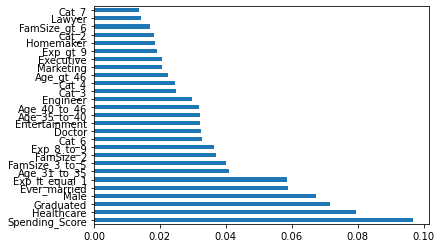

In [326]:
X = df4.iloc[:,0:-1]  #independent columns
y = df4.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

In [327]:
dfs = []
# for i in range(15,22):
#     a = 'tatacliq_data_'+str(i)+'feb_eventfreq.csv'
b = pd.read_csv('Test.csv',low_memory=False)

dfs.append(b)

In [345]:
df.Age.quantile

<bound method Series.quantile of 0       22
1       38
2       67
3       67
4       40
        ..
8063    22
8064    35
8065    33
8066    27
8067    37
Name: Age, Length: 8068, dtype: int64>

In [330]:
c = pd.read_csv('Train.csv',low_memory=False)
dfs.append(c)

In [336]:
len(dfs)

2

In [337]:
for df in dfs:
    print(df.shape)

(2627, 10)
(8068, 11)


In [339]:
for df in dfs:
    print(df.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')
Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')


In [343]:
pprint(dfs[0].head())

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6  


In [347]:
x.shape

(7376, 28)